<a href="https://colab.research.google.com/github/vavme/Google-News-Headlines-Sentimen-Analysis/blob/main/Sentiment_Classification_using_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
df = pd.read_excel('NewsHeadline_GOOGLE_1.xlsx')

In [ ]:
df.head(15)

In [ ]:
df = df.sort_values('date',ascending=False).reset_index(drop=True)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df[df['text'].str.contains("google|GOOGLE|Google")].reset_index(drop=True)

In [ ]:
#Checkpoint
df = data.copy()
data = df.copy()

In [ ]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import datetime

In [ ]:
nltk.download()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

porter = PorterStemmer()
stemmer = porter.stem
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = REMOVE_NUM.sub('', text)
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

In [ ]:
df['text'] = df['text'].apply(clean_text)

In [ ]:
df = df.drop_duplicates()

In [ ]:
#save file
df.to_excel('NewsHeadline_GOOGLE_2_cleaned.xlsx', index = False)

In [ ]:
skor = [vader.polarity_scores(text) for text in df['text']]
df_skor = pd.DataFrame(skor)
df = df.join(df_skor)

In [ ]:
df['week'] = df['date'].dt.week

<ipython-input-162-f4f191163118>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


In [ ]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [ ]:
df = df[df['year'] >= 2010]
df_1 = df[df['year'] == 2021]

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

#See weekly sentiment plot 2021
mean_c = df_1.groupby( 'week').mean()
mean_c = mean_c.unstack(level=-1)
mean_c = mean_c['compound']
mean_c.plot.bar()

In [ ]:
#checkpoint
data_1 = df.copy()
df = data_1.copy()

In [ ]:
def sentimen_by_compound(skor) :
    if skor > 0 :
        return 'positif'
    elif skor < 0 :
        return 'negatif'
    else :
        return 'netral'

In [ ]:
df['sentimen'] = df['compound'].apply(sentimen_by_compound)

In [ ]:
df.rename(columns={0: 'sentimen'}, inplace=True)

In [ ]:
df.to_csv('NewsHeadline_GOOGLE_3_sw_with_polarity2.csv', index = False)

In [ ]:
df = pd.read_csv('NewsHeadline_GOOGLE_3_sw_with_polarity2.csv')

In [ ]:
#checkpoint
data_2 = df.copy()

In [ ]:
df = data_2.copy()

In [ ]:
vocab_size = 1000
max_length = 25
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
dfs = df[['text','sentimen']].copy()
dfs = dfs.sample(frac=1, random_state=123)

X_train_val, X_tests, y_train_val, y_tests = train_test_split(dfs['text'], dfs['sentimen'],
                                                    test_size = 0.1, random_state = 123)
size = len(np.unique(y_tests))
if size == 3:
   pass
else : 
    print('Terdapat label yang tidak masuk dalam data_train')
print(X_train_val.shape,X_tests.shape)
print(y_train_val.shape,y_tests.shape)

(521,) (58,)
(521,) (58,)


In [ ]:
X_trains, X_vals, y_trains, y_vals = train_test_split(X_train_val, y_train_val,
                                                    test_size = 0.1, random_state = 123)
size = len(np.unique(y_trains))
if size == 3:
   pass
else : 
    print('Terdapat label yang tidak masuk dalam data_train')
print(X_trains.shape,X_vals.shape)
print(y_trains.shape,y_vals.shape)

(468,) (53,)
(468,) (53,)


In [ ]:
y_trains.value_counts()

netral     271
positif    106
negatif     91
Name: sentimen, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Create Data Train, Data Test and Data Validation
X_test = X_tests.copy()
y_test = y_tests.copy()

X_train = X_trains.copy()
y_train = y_trains.copy()

X_val = X_vals.copy()
y_val = y_vals.copy()

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_seq = tokenizer.texts_to_sequences(X_val)
validation_padded = pad_sequences(validation_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print('Shape of data tensor:', train_padded.shape)
print('Shape of data tensor:', validation_padded.shape)


y_train = y_train.values
y_val = y_val.values
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)


encode = OneHotEncoder()
# encode = LabelEncoder()
training_labels = encode.fit_transform(y_train)
validation_labels = encode.transform(y_val)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
train_padded, training_labels = ros.fit_resample(train_padded, training_labels)

print(train_padded.shape)
print(training_labels.shape)
print(validation_padded.shape)
print(validation_labels.shape)

try :
  validation_labels = validation_labels.toarray()
  training_labels = training_labels.toarray()
except :
  pass

print(type(train_padded))
print(type(validation_labels))
print(type(training_labels))
print(type(validation_padded))

Shape of data tensor: (468, 25)
Shape of data tensor: (53, 25)
(813, 25)
(813, 3)
(53, 25)
(53, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
X_train

293                     latest cloud pal salesforc googl
551                            googl goog earn preview q
269               googl start sell audiobook take amazon
459          googl propel nasdaq anoth record high close
173         googl charg smartphon maker googl play europ
                             ...                        
140    googl worker support propos us law curb mandat...
74            googl join hedera hashgraph govern council
564            googl pledg quest tighter privaci control
317    lithuanian man plead guilti defraud facebook g...
33     justic depart give judg big googl document req...
Name: text, Length: 468, dtype: object

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

y_test = y_test.values
y_test = y_test.reshape(-1,1)
y_test = encode.transform(y_test)
y_test = y_test.toarray()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
#Model Final
def Modelling(embed_dim, layer, vocab_size=1000, validation_data = (validation_padded, validation_labels),
              X_test = X_test, y_test = y_test) :
  tf.keras.backend.clear_session()
  embedding_dim = embed_dim
  model =[]
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      layer,
      tf.keras.layers.Dense(3, activation='softmax')
  ])
  summary = model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  epochs = 150

  history = model.fit(train_padded, training_labels, shuffle=True,
                    epochs=epochs, validation_data=validation_data, verbose=2)
  model_final = tf.keras.models.clone_model(model)
  
  y_pred = model.predict(X_test)
  y_pred1 = encode.inverse_transform(y_pred)
  y_pred1 = list(np.concatenate(y_pred1).flat)

  y_test1 = encode.inverse_transform(y_test)
  y_test1 = list(np.concatenate(y_test1).flat)
  cfm = confusion_matrix(y_test1, y_pred1, labels=['negatif', 'netral', 'positif'])

  print('Accuracy : {:.2f}%'.format(accuracy_score(y_test1, y_pred1)*100))
  print('Precision: {:.2f}%'.format(precision_score(y_test1, y_pred1, average="micro")*100))
  print('Recall: {:.2f}%'.format(recall_score(y_test1, y_pred1, average="micro")*100))
  print('F1-Score(m): {:.2f}%'.format(f1_score(y_test1, y_pred1, average="micro")*100))
  print('F1-Score(M) : {:.2f}%'.format(f1_score(y_test1, y_pred1, average='macro')*100))
  print('F1-Score(w) : {:.2f}%'.format(f1_score(y_test1, y_pred1, average='weighted')*100))
  return  summary, history, cfm, model_final

In [ ]:
sum_1, hist_1, cfm1, model_1 = Modelling(embed_dim = 16,
                                  layer = tf.keras.layers.LSTM(32, activation='tanh'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 22,371
Trainable params: 22,371
Non-trainable params: 0
_________________________________________________________________
Accuracy : 75.86%
Precision: 75.86%
Recall: 75.86%
F1-Score(m): 75.86%
F1-Score(M) : 74.41%
F1-Score(w) : 76.64%


In [ ]:
sum_2, hist_2, cfm_2, model_2 = Modelling(embed_dim = 16,
                                  layer = tf.keras.layers.LSTM(64, activation='tanh'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 36,931
Trainable params: 36,931
Non-trainable params: 0
_________________________________________________________________
Accuracy : 84.48%
Precision: 84.48%
Recall: 84.48%
F1-Score(m): 84.48%
F1-Score(M) : 82.50%
F1-Score(w) : 84.76%


In [ ]:
sum_3, hist_3, cfm_3, model_3 = Modelling(embed_dim =16,
                                  layer = tf.keras.layers.LSTM(128, activation='tanh'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               74240     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 90,627
Trainable params: 90,627
Non-trainable params: 0
_________________________________________________________________
Accuracy : 77.59%
Precision: 77.59%
Recall: 77.59%
F1-Score(m): 77.59%
F1-Score(M) : 73.31%
F1-Score(w) : 77.79%


In [ ]:
sum_4, hist_4, cfm_4, model_4 = Modelling(embed_dim = 32,
                                  layer = tf.keras.layers.LSTM(32, activation='tanh'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 40,419
Trainable params: 40,419
Non-trainable params: 0
_________________________________________________________________
Accuracy : 84.48%
Precision: 84.48%
Recall: 84.48%
F1-Score(m): 84.48%
F1-Score(M) : 81.11%
F1-Score(w) : 84.28%


In [ ]:
sum_5, hist_5, cfm_5, model_5 = Modelling(embed_dim = 32,
                                  layer = tf.keras.layers.LSTM(64, activation='tanh'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 57,027
Trainable params: 57,027
Non-trainable params: 0
_________________________________________________________________
Accuracy : 87.93%
Precision: 87.93%
Recall: 87.93%
F1-Score(m): 87.93%
F1-Score(M) : 86.71%
F1-Score(w) : 88.02%


In [ ]:
sum_6, hist_6, cfm_6, model_6 = Modelling(embed_dim = 32,
                                  layer = tf.keras.layers.LSTM(128, activation='tanh'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 114,819
Trainable params: 114,819
Non-trainable params: 0
_________________________________________________________________
Accuracy : 75.86%
Precision: 75.86%
Recall: 75.86%
F1-Score(m): 75.86%
F1-Score(M) : 72.22%
F1-Score(w) : 76.76%


In [ ]:
sum_7, hist_7, cfm_7, model_7 = Modelling(embed_dim = 16,
                                  layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 28,739
Trainable params: 28,739
Non-trainable params: 0
_________________________________________________________________
Accuracy : 84.48%
Precision: 84.48%
Recall: 84.48%
F1-Score(m): 84.48%
F1-Score(M) : 78.42%
F1-Score(w) : 83.14%


In [ ]:
sum_8, hist_8, cfm_8, model_8 = Modelling(embed_dim = 16,
                                  layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh')))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 57,859
Trainable params: 57,859
Non-trainable params: 0
_________________________________________________________________
Accuracy : 82.76%
Precision: 82.76%
Recall: 82.76%
F1-Score(m): 82.76%
F1-Score(M) : 78.05%
F1-Score(w) : 82.12%


In [ ]:
sum_9, hist_9, cfm_9, model_9 = Modelling(embed_dim = 16,
                                  layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='tanh')))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 8)             8000      
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               37376     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 45,763
Trainable params: 45,763
Non-trainable params: 0
_________________________________________________________________
Accuracy : 81.03%
Precision: 81.03%
Recall: 81.03%
F1-Score(m): 81.03%
F1-Score(M) : 76.75%
F1-Score(w) : 80.33%


In [ ]:
sum_10, hist_10, cfm_10, model_10 = Modelling(embed_dim = 32,                                
                                  layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 48,835
Trainable params: 48,835
Non-trainable params: 0
_________________________________________________________________
Accuracy : 86.21%
Precision: 86.21%
Recall: 86.21%
F1-Score(m): 86.21%
F1-Score(M) : 84.14%
F1-Score(w) : 86.39%


In [ ]:
sum_11, hist_11, cfm_11, model_11 = Modelling(embed_dim = 32,
                                  layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh')))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 82,051
Trainable params: 82,051
Non-trainable params: 0
_________________________________________________________________
Accuracy : 75.86%
Precision: 75.86%
Recall: 75.86%
F1-Score(m): 75.86%
F1-Score(M) : 74.09%
F1-Score(w) : 76.16%


In [ ]:
sum_12, hist_12, cfm_12, model_12 = Modelling(embed_dim = 32,
                                  layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='tanh')))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               164864    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 197,635
Trainable params: 197,635
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
26/26 - 10s - loss: 1.0939 - accuracy: 0.3862 - val_loss: 1.0718 - val_accuracy: 0.4528
Epoch 2/150
26/26 - 0s - loss: 0.9904 - accuracy: 0.5437 - val_loss: 1.1688 - val_accuracy: 0.1887
Epoch 3/150
26/26 - 0s - loss: 0.5978 - accuracy: 0.7196 - val_loss: 1.1201 - val_accuracy: 0.3962
Epoch 4/150
26/26 - 0s - loss: 0.3681 - accuracy: 0.8930 - val_loss: 1.0618 - val_

In [ ]:
#Model Final
def Modelling_Stacked(embed_dim, layer1, layer2, vocab_size=1000, validation_data = (validation_padded, validation_labels),
              X_test = X_test, y_test = y_test) :
  tf.keras.backend.clear_session()
  embedding_dim = embed_dim
  model =[]
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      layer1,
      layer2,
      tf.keras.layers.Dense(3, activation='softmax')
  ])
  summary = model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  epochs = 150

  history = model.fit(train_padded, training_labels, shuffle=True,
                    epochs=epochs, validation_data=validation_data, verbose=2)
  model_final = tf.keras.models.clone_model(model)
  
  y_pred = model.predict(X_test)
  y_pred1 = encode.inverse_transform(y_pred)
  y_pred1 = list(np.concatenate(y_pred1).flat)

  y_test1 = encode.inverse_transform(y_test)
  y_test1 = list(np.concatenate(y_test1).flat)
  cfm = confusion_matrix(y_test1, y_pred1, labels=['negatif', 'netral', 'positif'])

  print('Accuracy : {:.2f}%'.format(accuracy_score(y_test1, y_pred1)*100))
  print('Precision: {:.2f}%'.format(precision_score(y_test1, y_pred1, average="micro")*100))
  print('Recall: {:.2f}%'.format(recall_score(y_test1, y_pred1, average="micro")*100))
  print('F1-Score(m): {:.2f}%'.format(f1_score(y_test1, y_pred1, average="micro")*100))
  print('F1-Score(M) : {:.2f}%'.format(f1_score(y_test1, y_pred1, average='macro')*100))
  print('F1-Score(w) : {:.2f}%'.format(f1_score(y_test1, y_pred1, average='weighted')*100))
  return  summary, history, cfm, model_final

In [ ]:
sum_13, hist_13, cfm_13, model_13 = Modelling_Stacked(embed_dim = 16,
                                  layer1 = tf.keras.layers.LSTM(32, activation='tanh',return_sequences=True),
                                  layer2 = tf.keras.layers.LSTM(16, activation='tanh'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
lstm (LSTM)                  (None, 25, 32)            6272      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 3)                 51        
Total params: 25,459
Trainable params: 25,459
Non-trainable params: 0
_________________________________________________________________
Accuracy : 79.31%
Precision: 79.31%
Recall: 79.31%
F1-Score(m): 79.31%
F1-Score(M) : 76.49%
F1-Score(w) : 79.32%


In [ ]:
sum_14, hist_14, cfm_14, model_14 = Modelling_Stacked(embed_dim = 16,
                                  layer1 = tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
                                  layer2 = tf.keras.layers.LSTM(32, activation='tanh'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
lstm (LSTM)                  (None, 25, 64)            20736     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 49,251
Trainable params: 49,251
Non-trainable params: 0
_________________________________________________________________
Accuracy : 82.76%
Precision: 82.76%
Recall: 82.76%
F1-Score(m): 82.76%
F1-Score(M) : 80.02%
F1-Score(w) : 82.84%


In [ ]:
sum_15, hist_15, cfm_15, model_15 = Modelling_Stacked(embed_dim = 16,
                                  layer1 = tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True),
                                  layer2 = tf.keras.layers.LSTM(64, activation='tanh'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           74240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 139,843
Trainable params: 139,843
Non-trainable params: 0
_________________________________________________________________
Accuracy : 81.03%
Precision: 81.03%
Recall: 81.03%
F1-Score(m): 81.03%
F1-Score(M) : 79.04%
F1-Score(w) : 81.84%


In [ ]:
sum_16, hist_16, cfm_16, model_16 = Modelling_Stacked(embed_dim = 32,
                                  layer1 = tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True),
                                  layer2 = tf.keras.layers.LSTM(16, activation='tanh'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 25, 32)            8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 3)                 51        
Total params: 43,507
Trainable params: 43,507
Non-trainable params: 0
_________________________________________________________________
Accuracy : 74.14%
Precision: 74.14%
Recall: 74.14%
F1-Score(m): 74.14%
F1-Score(M) : 69.58%
F1-Score(w) : 75.04%


In [ ]:
sum_17, hist_17, cfm_17, model_17 = Modelling_Stacked(embed_dim = 32,
                                  layer1 = tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
                                  layer2 = tf.keras.layers.LSTM(32, activation='tanh'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 25, 64)            24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 69,347
Trainable params: 69,347
Non-trainable params: 0
_________________________________________________________________
Accuracy : 86.21%
Precision: 86.21%
Recall: 86.21%
F1-Score(m): 86.21%
F1-Score(M) : 83.38%
F1-Score(w) : 86.12%


In [ ]:
sum_18, hist_18, cfm_18, model_18 = Modelling_Stacked(embed_dim = 32,
                                  layer1 = tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True),
                                  layer2 = tf.keras.layers.LSTM(64, activation='tanh'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           82432     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 164,035
Trainable params: 164,035
Non-trainable params: 0
_________________________________________________________________
Accuracy : 81.03%
Precision: 81.03%
Recall: 81.03%
F1-Score(m): 81.03%
F1-Score(M) : 76.57%
F1-Score(w) : 80.52%


In [ ]:
sum_19, hist_19, cfm_19, model_19 = Modelling_Stacked(embed_dim = 16,
                                  layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True)),
                                  layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='tanh')))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 64)            12544     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 39,011
Trainable params: 39,011
Non-trainable params: 0
_________________________________________________________________
Accuracy : 79.31%
Precision: 79.31%
Recall: 79.31%
F1-Score(m): 79.31%
F1-Score(M) : 77.70%
F1-Score(w) : 79.72%


In [ ]:
sum_20, hist_20, cfm_20, model_20 = Modelling_Stacked(embed_dim = 16,
                                  layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True)),
                                  layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 128)           41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 98,883
Trainable params: 98,883
Non-trainable params: 0
_________________________________________________________________
Accuracy : 81.03%
Precision: 81.03%
Recall: 81.03%
F1-Score(m): 81.03%
F1-Score(M) : 78.72%
F1-Score(w) : 81.25%


In [ ]:
sum_21, hist_21, cfm_21, model_21 = Modelling_Stacked(embed_dim = 16,
                                  layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True)),
                                  layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh')))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           148480    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 329,219
Trainable params: 329,219
Non-trainable params: 0
_________________________________________________________________
Accuracy : 86.21%
Precision: 86.21%
Recall: 86.21%
F1-Score(m): 86.21%
F1-Score(M) : 83.78%
F1-Score(w) : 86.25%


In [ ]:
sum_22, hist_22, cfm_22, model_22 = Modelling_Stacked(embed_dim = 32,
                                  layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True)),
                                  layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='tanh')))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 64)            16640     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 59,107
Trainable params: 59,107
Non-trainable params: 0
_________________________________________________________________
Accuracy : 82.76%
Precision: 82.76%
Recall: 82.76%
F1-Score(m): 82.76%
F1-Score(M) : 79.48%
F1-Score(w) : 82.61%


In [ ]:
sum_23, hist_23, cfm_23, model_23 = Modelling_Stacked(embed_dim = 32,
                                  layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True)),
                                  layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 128)           49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 123,075
Trainable params: 123,075
Non-trainable params: 0
_________________________________________________________________
Accuracy : 89.66%
Precision: 89.66%
Recall: 89.66%
F1-Score(m): 89.66%
F1-Score(M) : 87.26%
F1-Score(w) : 89.57%


In [ ]:
sum_24, hist_24, cfm_24, model_24 = Modelling_Stacked(embed_dim = 32,
                                  layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True)),
                                  layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh')))                                  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           164864    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 361,603
Trainable params: 361,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
26/26 - 9s - loss: 1.0972 - accuracy: 0.3653 - val_loss: 1.0884 - val_accuracy: 0.1698
Epoch 2/150
26/26 - 1s - loss: 0.8607 - accuracy: 0.5535 - val_loss: 0.9131 - val_accuracy: 0.5094
Epoch 3/150
26/26 - 1s - loss: 0.2906 - accuracy: 

In [ ]:
#Model Final
def Modelling_drp(embed_dim, layer, vocab_size=1000, validation_data = (validation_padded, validation_labels),
              X_test = X_test, y_test = y_test) :
  tf.keras.backend.clear_session()
  embedding_dim = embed_dim
  model =[]
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      layer,
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(3, activation='softmax')
  ])
  summary = model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  epochs = 150

  history = model.fit(train_padded, training_labels, shuffle=True,
                    epochs=epochs, validation_data=validation_data, verbose=0)
  model_final = tf.keras.models.clone_model(model)
  
  y_pred = model.predict(X_test)
  y_pred1 = encode.inverse_transform(y_pred)
  y_pred1 = list(np.concatenate(y_pred1).flat)

  y_test1 = encode.inverse_transform(y_test)
  y_test1 = list(np.concatenate(y_test1).flat)
  cfm = confusion_matrix(y_test1, y_pred1, labels=['negatif', 'netral', 'positif'])

  print('Accuracy : {:.2f}%'.format(accuracy_score(y_test1, y_pred1)*100))
  print('Precision: {:.2f}%'.format(precision_score(y_test1, y_pred1, average="micro")*100))
  print('Recall: {:.2f}%'.format(recall_score(y_test1, y_pred1, average="micro")*100))
  print('F1-Score(m): {:.2f}%'.format(f1_score(y_test1, y_pred1, average="micro")*100))
  print('F1-Score(M) : {:.2f}%'.format(f1_score(y_test1, y_pred1, average='macro')*100))
  print('F1-Score(w) : {:.2f}%'.format(f1_score(y_test1, y_pred1, average='weighted')*100))
  return  summary, history, cfm, model_final

In [ ]:
sum_5_drp, hist_5_drp, cfm_5_drp, model_5_drp = Modelling_drp(embed_dim = 32,
                                  layer = tf.keras.layers.LSTM(64, activation='tanh'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 57,027
Trainable params: 57,027
Non-trainable params: 0
_________________________________________________________________
Accuracy : 82.76%
Precision: 82.76%
Recall: 82.76%
F1-Score(m): 82.76%
F1-Score(M) : 79.44%
F1-Score(w) : 82.68%


In [ ]:
sum_10_drp, hist_10_drp, cfm_10_drp, model_10_drp = Modelling_drp(embed_dim = 32,                                
                                  layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 48,835
Trainable params: 48,835
Non-trainable params: 0
_________________________________________________________________
Accuracy : 81.03%
Precision: 81.03%
Recall: 81.03%
F1-Score(m): 81.03%
F1-Score(M) : 77.25%
F1-Score(w) : 80.52%


In [ ]:
#Model Final
def Modelling_Stacked_drp(embed_dim, layer1, layer2, vocab_size=1000, validation_data = (validation_padded, validation_labels),
              X_test = X_test, y_test = y_test) :
  tf.keras.backend.clear_session()
  embedding_dim = embed_dim
  model =[]
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      layer1,
      layer2,
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(3, activation='softmax')
  ])
  summary = model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  epochs = 150

  history = model.fit(train_padded, training_labels, shuffle=True,
                    epochs=epochs, validation_data=validation_data, verbose=0)
  model_final = tf.keras.models.clone_model(model)
  
  y_pred = model.predict(X_test)
  y_pred1 = encode.inverse_transform(y_pred)
  y_pred1 = list(np.concatenate(y_pred1).flat)

  y_test1 = encode.inverse_transform(y_test)
  y_test1 = list(np.concatenate(y_test1).flat)
  cfm = confusion_matrix(y_test1, y_pred1, labels=['negatif', 'netral', 'positif'])

  print('Accuracy : {:.2f}%'.format(accuracy_score(y_test1, y_pred1)*100))
  print('Precision: {:.2f}%'.format(precision_score(y_test1, y_pred1, average="micro")*100))
  print('Recall: {:.2f}%'.format(recall_score(y_test1, y_pred1, average="micro")*100))
  print('F1-Score(m): {:.2f}%'.format(f1_score(y_test1, y_pred1, average="micro")*100))
  print('F1-Score(M) : {:.2f}%'.format(f1_score(y_test1, y_pred1, average='macro')*100))
  print('F1-Score(w) : {:.2f}%'.format(f1_score(y_test1, y_pred1, average='weighted')*100))
  return  summary, history, cfm, model_final

In [ ]:
sum_17_drp, hist_17_drp, cfm_17_drp, model_17_drp = Modelling_Stacked_drp(embed_dim = 32,
                                  layer1 = tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
                                  layer2 = tf.keras.layers.LSTM(32, activation='tanh'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 25, 64)            24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 69,347
Trainable params: 69,347
Non-trainable params: 0
_________________________________________________________________
Accuracy : 75.86%
Precision: 75.86%
Recall: 75.86%
F1-Score(m): 75.86%
F1-Score(M) : 74.70%
F1-Score(w) : 77.36%


In [ ]:
sum_23_drp, hist_23_drp, cfm_23_drp, model_23_drp = Modelling_Stacked_drp(embed_dim = 32,
                                  layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True)),
                                  layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 128)           49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 123,075
Trainable params: 123,075
Non-trainable params: 0
_________________________________________________________________
Accuracy : 75.86%
Precision: 75.86%
Recall: 75.86%
F1-Score(m): 75.86%
F1-Score(M) : 74.82%
F1-Score(w) : 76.53%


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# for i in range(0, len(dfs_test)) :
#   dfs_text = dfs_test["text"].iloc[i]
#   # dfs_text = [clean_text(dfs_text)]
#   dfs_text = tokenizer.texts_to_sequences(dfs_text)
#   dfs_text_padded = pad_sequences(dfs_text, maxlen=max_length, padding=padding_type,
#                                    truncating=trunc_type)
#   result_sentimen = model.predict(dfs_text_padded)
#   pred = encode.inverse_transform(result_sentimen)
#   pred = str(pred.tolist()[0][0])
#   dfs_test["Predicted Sentimen"].iloc[i]= pred

In [ ]:
# y_true = dfs_test['sentimen']
# y_pred = dfs_test['Predicted Sentimen']

# confusion_matrix(y_true, y_pred, labels=['negatif', 'netral', 'positif'])

array([[ 0, 13,  0],
       [ 0, 24,  0],
       [ 0,  5,  0]])

In [ ]:
# y_pred = model.predict(X_test)
# pred1 = encode.inverse_transform(y_pred)
# pred1 = list(np.concatenate(pred1).flat)

# y_test1 = encode.inverse_transform(y_test)
# y_test1 = list(np.concatenate(y_test1).flat)
# cfm = confusion_matrix(y_test1, pred, labels=['negatif', 'netral', 'positif'])

In [ ]:
confusion_matrix(y_test1, pred, labels=['negatif', 'netral', 'positif'])

array([[ 8,  4,  0],
       [11, 24,  0],
       [ 5,  1,  5]])

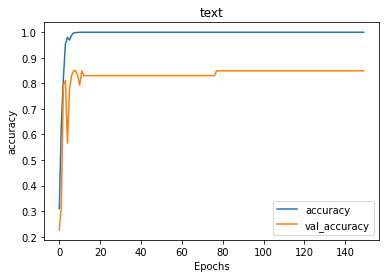

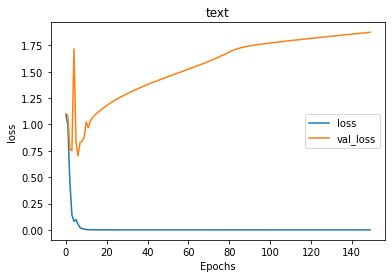

In [ ]:
def plot_graphs(history, string, model):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.title(model)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(hist_23, "accuracy", 'text')
plot_graphs(hist_23, "loss", 'text')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    import itertools
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[11  1  0]
 [ 2 33  0]
 [ 1  2  8]]


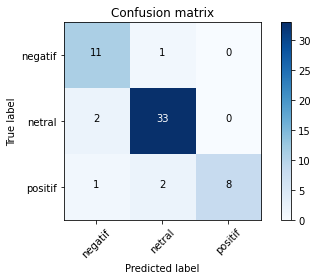

In [ ]:
plt.figure()
plot_confusion_matrix(cfm_23, classes=['negatif', 'netral', 'positif'],
                      title='Confusion matrix')

In [ ]:
sum_23, hist_23, cfm_23, model_23 = Modelling_Stacked(embed_dim = 32,
                                  layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True)),
                                  layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 128)           49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 123,075
Trainable params: 123,075
Non-trainable params: 0
_________________________________________________________________
Accuracy : 87.93%
Precision: 87.93%
Recall: 87.93%
F1-Score(m): 87.93%
F1-Score(M) : 85.29%
F1-Score(w) : 87.84%


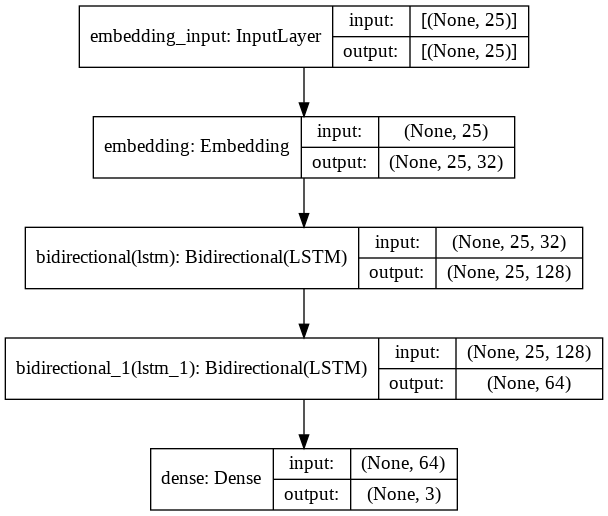

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_23, show_shapes=True, show_layer_names=True, expand_nested=True)